# **Samsung Electronic Stock Price Prediction**
![texto alternativo](https://www.cnetfrance.fr/i/edit/2012/11/39784268/620x465/samsung-logo.jpg)


# About Samsung

Samsung (Hangul: 삼성; Hanja: 三星; Korean pronunciation: [samsʌŋ]; means "tristar" in English) is a South Korean multinational conglomerate headquartered in Samsung Town, Seoul. It comprises numerous affiliated businesses, most of them united under the Samsung brand, and is the largest South Korean chaebol (business conglomerate).

Notable Samsung industrial affiliates include Samsung Electronics (the world's largest information technology company, consumer electronics maker and chipmaker measured by 2017 revenues),Samsung Heavy Industries (the world's 2nd largest shipbuilder measured by 2010 revenues),and Samsung Engineering and Samsung C&T (respectively the world's 13th and 36th largest construction companies).Other notable subsidiaries include Samsung Life Insurance (the world's 14th largest life insurance company), Samsung Everland (operator of Everland Resort, the oldest theme park in South Korea) and Cheil Worldwide (the world's 15th largest advertising agency measured by 2012 revenues)

In [0]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output as clean

In [0]:
#Data downloaded from Yahoo Finance Data
#Imported from local disk
from google.colab import files
files.upload()

In [2]:
df = pd.read_csv("Samsung.csv")
#Display file data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-26,38400.0,38750.0,38300.0,38350.0,37996.0,12707675
1,2018-12-27,38700.0,38800.0,38100.0,38250.0,38250.0,10510643
2,2018-12-28,38250.0,38900.0,38200.0,38700.0,38700.0,9900267
3,2019-01-02,39400.0,39400.0,38550.0,38750.0,38750.0,7847664
4,2019-01-03,38300.0,38550.0,37450.0,37600.0,37600.0,12471493


There are multiple variables in the dataset – Date, Open, High, Low, Adj. Close, Close, Volume.

* The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
* High, Low and Adj. Close represent the maximum, minimum, and last price of the share for the day.
* Volume is the number of shares bought or sold in the day 

In [3]:
df.shape

(26, 7)

In [4]:
#Most tupes are float or int, just date has different format
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

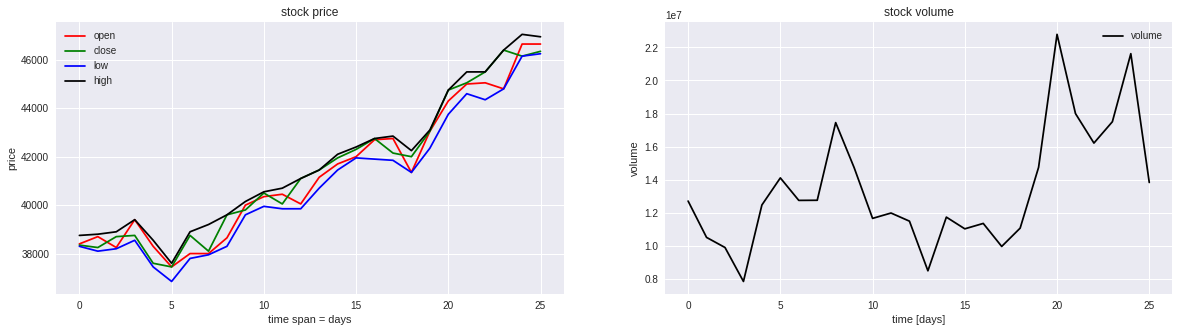

In [5]:
#Plotting features

plt.figure(figsize=(20, 5));
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time span = days')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df.Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [0]:
#Selecting data and target columns
df_y = df["Close"].values
df_X = df.index.values

#Converting them into 2D arrays.
y = np.reshape(df_y,(len(df_y),1))
X = np.reshape(df_X,(len(df_X),1))

# Linear Regression Function

In [0]:
m = len(X)#number of samples
weights = np.random.rand(2,1)#random weights initialization 
iterations = 4000 
y_max = np.max(y)

bias_column = np.ones((m,1))
learning_rate = 0.005

In [0]:
X = np.concatenate((bias_column,X),axis=1)#adding bias column to main array
y=y/y_max #not the best normalization technique but for this example is just enough

![texto alternativo](https://i.stack.imgur.com/O752N.png)

In [0]:
def cost_function(X,y,weights):
  J = np.subtract(np.matmul(X,weights),y)
  J = np.power(J,2)
  J = 1/(2*m)*np.sum(J)
  return J;

![texto alternativo](https://2.bp.blogspot.com/-ZxJ87cWjPJ8/TtLtwqv0hCI/AAAAAAAAAV0/9FYqcxJ6dNY/s1600/gradient+descent+algorithm+OLS.png)

In [0]:
#Vectorize function of gradient descent
def gradiend_descent(X,y,weights,lr,iterations):
  print_every = 1000
  for i in range(iterations):
    a = np.subtract(np.matmul(X,weights),y)
    b = np.transpose(X)
    z = np.matmul(b,a)
    weights = np.subtract(weights,(lr/m)*z);
    
    if i%print_every==0:
      print(cost_function(X,y,weights))
  return weights

In [145]:
#applying gradient descent to optimize weights values
new_weights = gradiend_descent(X,y,weights,learning_rate,iterations)

0.20980909857118546
0.00039638868122663696
0.0001612927265738982
0.00014451029107314574


In [146]:
new_weights # values for intercept term and X weight

array([[0.79366812],
       [0.00789807]])

In [147]:
#Testing new optimizated weights
test = np.matmul(X[15,:],new_weights)
print("Prediction: {} Real {}:".format(test,y[15]))

Prediction: [0.91213924] Real [0.91163793]:


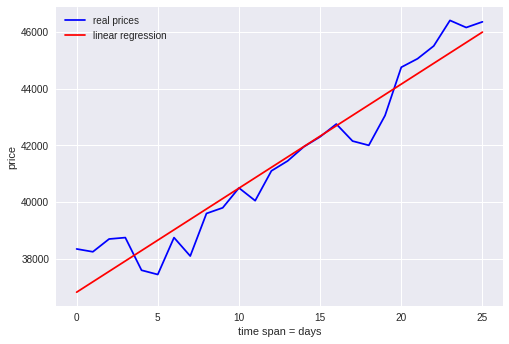

In [151]:
plt.plot(X[:,1],y*y_max,color='blue',label='real prices')
plt.plot(X[:,1],np.matmul(X,new_weights)*y_max, color='red', label='linear regression')
plt.xlabel('time span = days')
plt.ylabel('price')
plt.legend(loc='best')